In [2]:
import pandas as pd
import numpy as np


 Here we will do reading and cleaning of the data from the the csv file and aslo handeling the file if its empty and handeling every type of error

In [23]:
import numpy as np
import pandas as pd 

# Load the dataset with error handling
try:
    df = pd.read_csv(r"C:\Users\AMAN TRIVEDI\Desktop\Python codes\country_wise_latest.csv")
    
    # Drop specified columns if they exist
    columns_to_drop = ['Lat', 'Long' , 'WHO Region']
    existing_columns = [col for col in columns_to_drop if col in df.columns]
    if existing_columns:
        df = df.drop(columns=existing_columns)
    
    # Print DataFrame information
    print("Dataset Information:")
    print(df.info())
    print("\nDescriptive Statistics:")
    print(df.describe())

except FileNotFoundError:
    print("Error: Could not find the CSV file. Please check the file path.")
except pd.errors.EmptyDataError:
    print("Error: The CSV file is empty.")
except Exception as e:
    print(f"An error occurred: {str(e)}")

df.to_csv(r"C:\Users\AMAN TRIVEDI\Desktop\Python codes\country_wise_latest_cleaned.csv", index=False)
print("Cleaned dataset saved successfully.")

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country/Region          187 non-null    object 
 1   Confirmed               187 non-null    int64  
 2   Deaths                  187 non-null    int64  
 3   Recovered               187 non-null    int64  
 4   Active                  187 non-null    int64  
 5   New cases               187 non-null    int64  
 6   New deaths              187 non-null    int64  
 7   New recovered           187 non-null    int64  
 8   Deaths / 100 Cases      187 non-null    float64
 9   Recovered / 100 Cases   187 non-null    float64
 10  Deaths / 100 Recovered  187 non-null    float64
 11  Confirmed last week     187 non-null    int64  
 12  1 week change           187 non-null    int64  
 13  1 week % increase       187 non-null    float64
dtypes: float64(4), int64(

c:\Users\AMAN TRIVEDI\Desktop\Python codes\.venv\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


## Here we will do basic analysis of total no of death , total no of confirmed cases, total no of recovery adn total active case 

In [ ]:
print("\nFirst few rows of the dataset:")
# print(df.head(1))

sum = df['Confirmed'].sum()
print(f"\nTotal confirmed cases across all countries: {sum}")

death_sum = df['Deaths'].sum()
print(f"Total deaths across all countries: {death_sum}")

recovered_sum = df['Recovered'].sum()
print(f"Total recovered cases across all countries: {recovered_sum}")

active_sum = df['Active'].sum()
print(f"Total active cases across all countries: {active_sum}")





First few rows of the dataset:
  Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                 3.5                  69.49   

   Deaths / 100 Recovered  Confirmed last week  
0                    5.04                35526  

Total confirmed cases across all countries: 16480485
Total deaths across all countries: 654036
Total recovered cases across all countries: 9468087
Total active cases across all countries: 6358362

Country with the highest number of confirmed cases: US with 4290259 cases.
Country with the highest number of deaths: US with 148011 deaths.
Country with the lowest number of confirmed cases: Western Sahara with 10 cases.
Country with the lowest number of deaths: Bhutan with 0 deaths.


Now we will do analysis of data as per paient recovered , No of death , No of active case, Death Rate adn we will also add the Death rate column to the orignal data frame saving it in CSV formate

In [56]:
# Sort the dataframe by confirmed cases in descending order
# df.sort_values(by='Confirmed', ascending=False, inplace=True)
# print("\nData sorted by confirmed cases in descending order:")
# print(df.head(10))

#country with the highest number of confirmed cases
highest_confirmed = df.loc[df['Confirmed'].idxmax()]
country_highest_confirmed_cases = highest_confirmed['Country/Region']
highest_confirmed_cases = highest_confirmed['Confirmed']

print(f"\nCountry with the highest number of confirmed cases: {country_highest_confirmed_cases} with {highest_confirmed_cases} cases.")

#country with the highest number of deaths
highest_deaths = df.loc[df['Deaths'].idxmax()]
country_highest_deaths = highest_deaths['Country/Region']
highest_deaths_count = highest_deaths['Deaths']
print(f"Country with the highest number of deaths: {country_highest_deaths} with {highest_deaths_count} deaths.")

#lowest number of confirmed cases
lowest_confirmed = df.loc[df['Confirmed'].idxmin()]
country_lowest_confirmed_cases = lowest_confirmed['Country/Region']
lowest_confirmed_cases = lowest_confirmed['Confirmed']
print(f"Country with the lowest number of confirmed cases: {country_lowest_confirmed_cases} with {lowest_confirmed_cases} cases.")


#lowest number of deaths
lowest_deaths = df.loc[df['Deaths'].idxmin()]
country_lowest_deaths = lowest_deaths['Country/Region']
lowest_deaths_count = lowest_deaths['Deaths']
print(f"Country with the lowest number of deaths: {country_lowest_deaths} with {lowest_deaths_count} deaths.")



#country with the highest number of recovered cases
highest_recovered = df.loc[df['Recovered'].idxmax()]
country_highest_recovered_cases = highest_recovered['Country/Region']
highest_recovered_cases = highest_recovered['Recovered']
print(f"\nCountry with the highest number of recovered cases: {country_highest_recovered_cases} with {highest_recovered_cases} cases.")

#country with lowest number of recovered cases
lowest_recovered = df.loc[df['Recovered'].idxmin()]
country_lowest_recovered_cases = lowest_recovered['Country/Region']
lowest_recovered_cases = lowest_recovered['Recovered']
print(f"Country with the lowest number of recovered cases: {country_lowest_recovered_cases} with {lowest_recovered_cases} cases.")

#country with the highest number of active cases
highest_active = df.loc[df['Active'].idxmax()]
country_highest_active_cases = highest_active['Country/Region']
highest_active_cases = highest_active['Active']
print(f"\nCountry with the highest number of active cases: {country_highest_active_cases} with {highest_active_cases} cases.")
#country with the lowest number of active cases
lowest_active = df.loc[df['Active'].idxmin()]
country_lowest_active_cases = lowest_active['Country/Region']
lowest_active_cases = lowest_active['Active']
print(f"Country with the lowest number of active cases: {country_lowest_active_cases} with {lowest_active_cases} cases.")

#country with highest recovery rate
df['Recovery Rate'] = df['Recovered'] / df['Confirmed'] * 100
highest_recovery_rate = df.loc[df['Recovery Rate'].idxmax()]
country_highest_recovery_rate = highest_recovery_rate['Country/Region']
highest_recovery_rate_value = highest_recovery_rate['Recovery Rate']
print(f"\nCountry with the highest recovery rate: {country_highest_recovery_rate} with a recovery rate of {highest_recovery_rate_value:.2f}%.")
#country with lowest recovery rate
lowest_recovery_rate = df.loc[df['Recovery Rate'].idxmin()]
country_lowest_recovery_rate = lowest_recovery_rate['Country/Region']
lowest_recovery_rate_value = lowest_recovery_rate['Recovery Rate']
print(f"Country with the lowest recovery rate: {country_lowest_recovery_rate} with a recovery rate of {lowest_recovery_rate_value:.2f}%.")

#country with highest death rate
df['Death Rate'] = df['Deaths'] / df['Confirmed'] * 100
highest_death_rate = df.loc[df['Death Rate'].idxmax()]
country_highest_death_rate = highest_death_rate['Country/Region']
highest_death_rate_value = highest_death_rate['Death Rate']
print(f"\nCountry with the highest death rate: {country_highest_death_rate} with a death rate of {highest_death_rate_value:.2f}%.")
#country with lowest death rate
lowest_death_rate = df.loc[df['Death Rate'].idxmin()]
country_lowest_death_rate = lowest_death_rate['Country/Region']
lowest_death_rate_value = lowest_death_rate['Death Rate']
print(f"Country with the lowest death rate: {country_lowest_death_rate} with a death rate of {lowest_death_rate_value:.2f}%.")


# Highest deaths per 100 cases
high_death_100 = df.loc[df['Deaths per 100 Cases'].idxmax()]
country_high_death_100 = high_death_100['Country/Region']
highest_death_100_value = high_death_100['Deaths per 100 Cases']
print(f"\nCountry with the highest deaths per 100 cases: {country_high_death_100} with a death rate of {highest_death_100_value:.2f}%")

# Lowest deaths per 100 cases
lowest_death_100 = df.loc[df['Deaths per 100 Cases'].idxmin()]
country_low_death_100 = lowest_death_100['Country/Region']
lowest_death_100_value = lowest_death_100['Deaths per 100 Cases']
print(f"Country with the lowest deaths per 100 cases: {country_low_death_100} with a death rate of {lowest_death_100_value:.2f}%")

df.to_csv(r"C:\Users\AMAN TRIVEDI\Desktop\Python codes\country_wise_latest_analysis.csv", index=False)
print("Analysis results saved successfully.")


Country with the highest number of confirmed cases: US with 4290259 cases.
Country with the highest number of deaths: US with 148011 deaths.
Country with the lowest number of confirmed cases: Western Sahara with 10 cases.
Country with the lowest number of deaths: Vietnam with 0 deaths.

Country with the highest number of recovered cases: Brazil with 1846641 cases.
Country with the lowest number of recovered cases: Canada with 0 cases.

Country with the highest number of active cases: US with 2816444 cases.
Country with the lowest number of active cases: San Marino with 0 cases.

Country with the highest recovery rate: Grenada with a recovery rate of 100.00%.
Country with the lowest recovery rate: Canada with a recovery rate of 0.00%.

Country with the highest death rate: Yemen with a death rate of 28.56%.
Country with the lowest death rate: Vietnam with a death rate of 0.00%.

Country with the highest deaths per 100 cases: Yemen with a death rate of 28.56%
Country with the lowest deat

### now we will do basic visualization of code as per confirmed cases , deaths,recovered , Death_rate and active cases

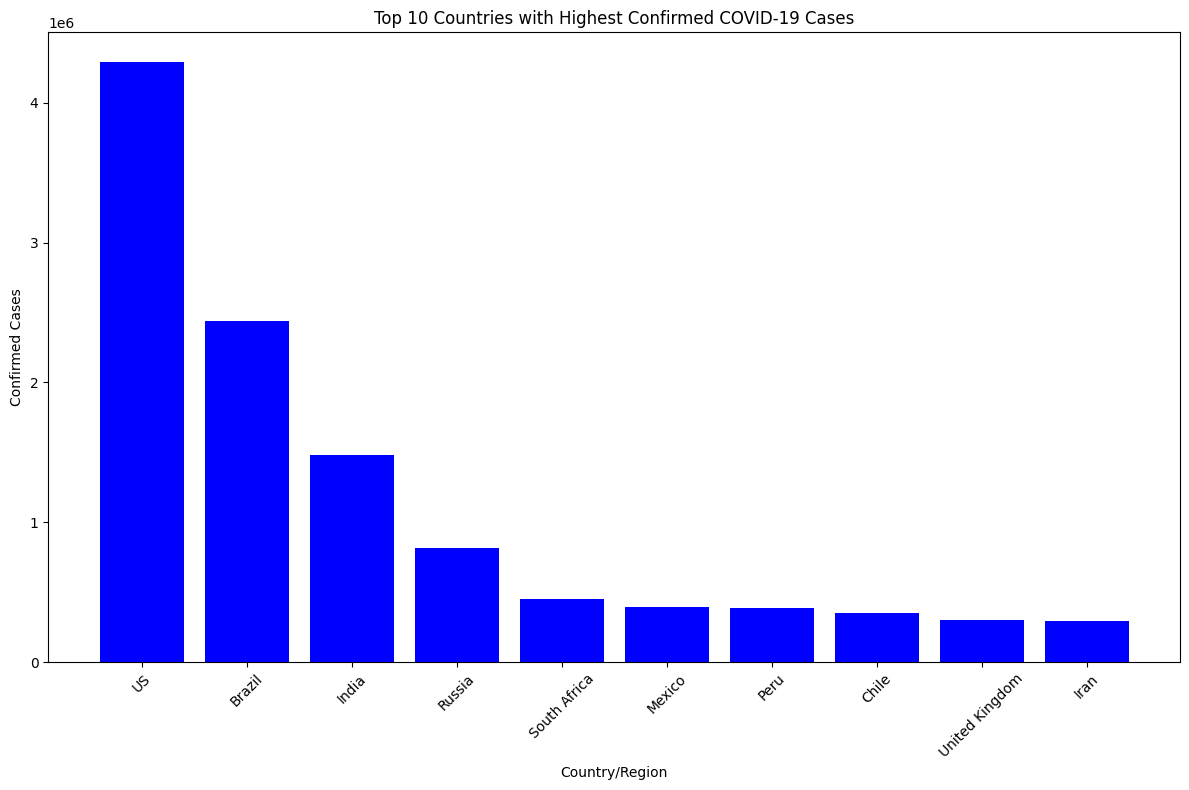

In [47]:
import matplotlib.pyplot as plt
# Plotting the top 10 countries with the highest confirmed cases

top_10_countries = df.nlargest(10, 'Confirmed')
plt.figure(figsize=(12, 8))
plt.bar(top_10_countries['Country/Region'], top_10_countries['Confirmed'], color='blue')
plt.xlabel('Country/Region')
plt.ylabel('Confirmed Cases')
plt.title('Top 10 Countries with Highest Confirmed COVID-19 Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\AMAN TRIVEDI\Desktop\Python codes\top_10_confirmed_cases.png")
plt.show()


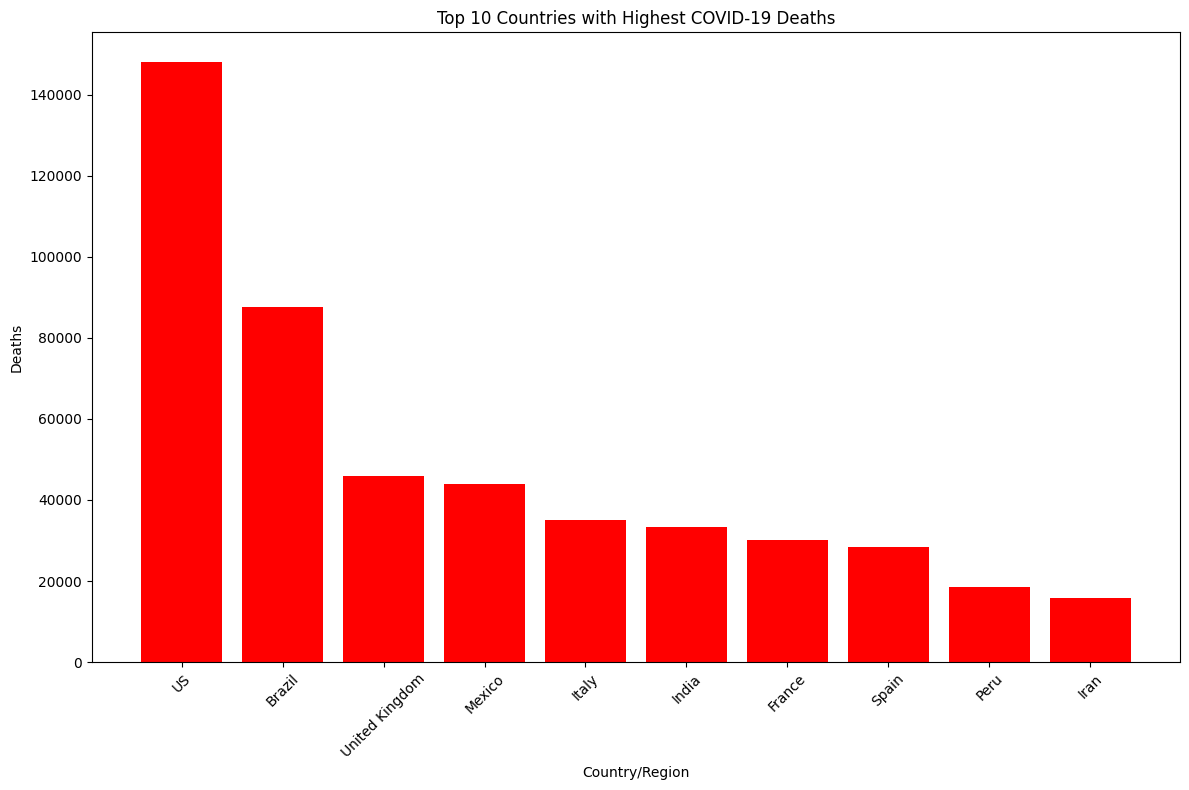

In [49]:
#10 10 country with highest deaths
top_10_deaths = df.nlargest(10, 'Deaths')
plt.figure(figsize=(12, 8))
plt.bar(top_10_deaths['Country/Region'], top_10_deaths['Deaths'], color='red')
plt.xlabel('Country/Region')
plt.ylabel('Deaths')
plt.title('Top 10 Countries with Highest COVID-19 Deaths')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\AMAN TRIVEDI\Desktop\Python codes\top_10_deaths.png")
plt.show()

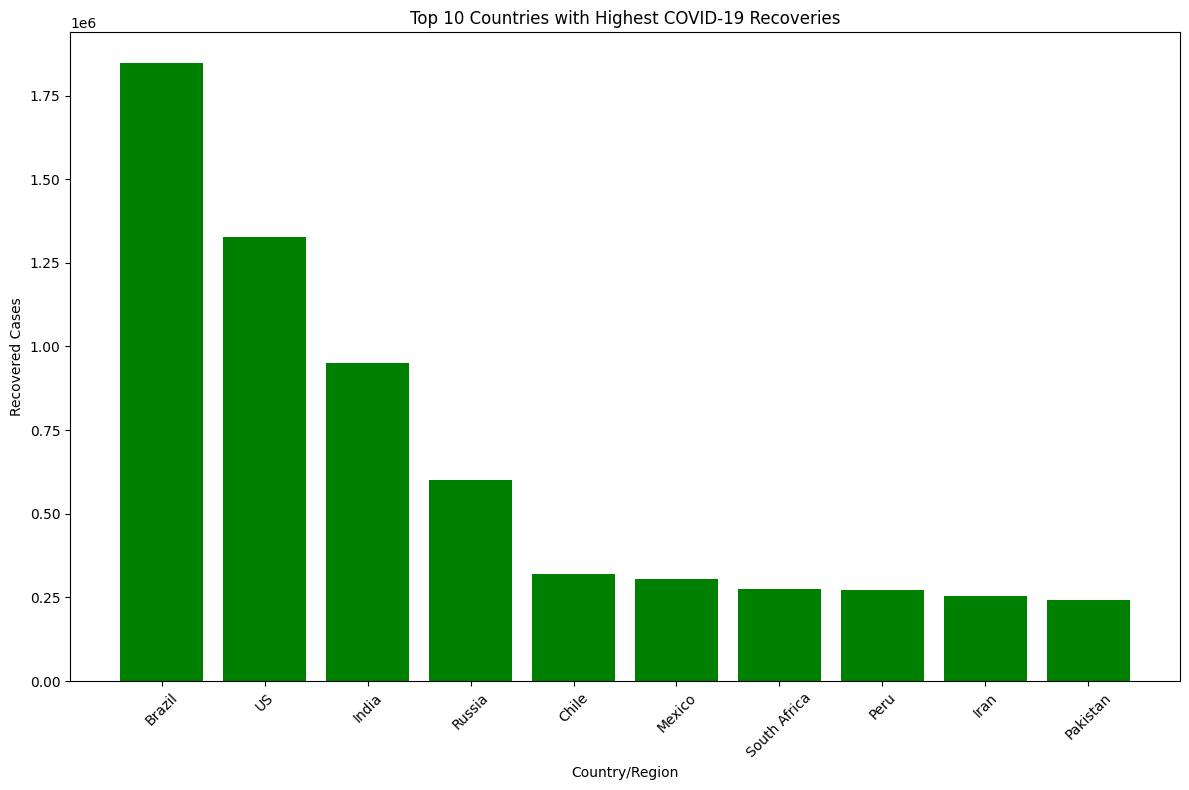

In [50]:
#top 10 countries with the highest recovery
top_10_recovered = df.nlargest(10, 'Recovered')
plt.figure(figsize=(12, 8))
plt.bar(top_10_recovered['Country/Region'], top_10_recovered['Recovered'], color='green')
plt.xlabel('Country/Region')
plt.ylabel('Recovered Cases')
plt.title('Top 10 Countries with Highest COVID-19 Recoveries')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\AMAN TRIVEDI\Desktop\Python codes\top_10_recovered.png")
plt.show()

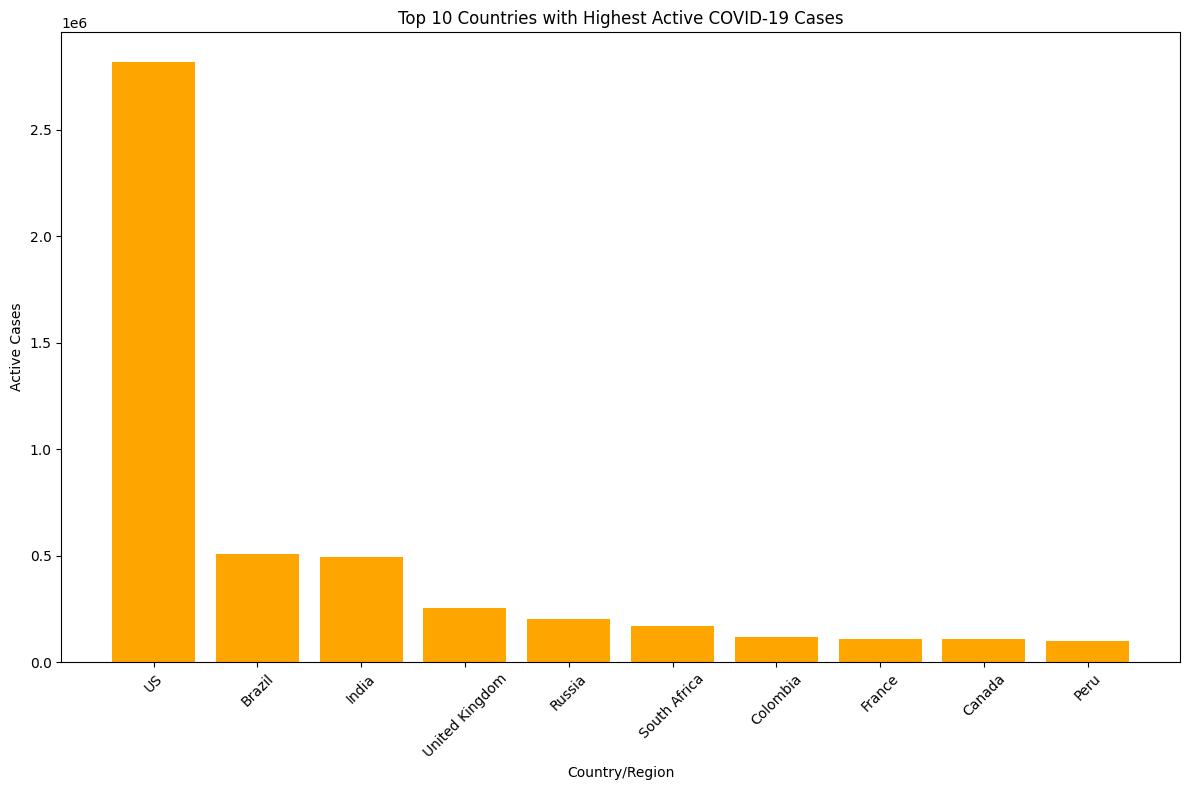

In [52]:
#top 10 country with the highest active cases
top_10_active = df.nlargest(10, 'Active')
plt.figure(figsize=(12, 8))
plt.bar(top_10_active['Country/Region'], top_10_active['Active'], color='orange')
plt.xlabel('Country/Region')
plt.ylabel('Active Cases')
plt.title('Top 10 Countries with Highest Active COVID-19 Cases')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\AMAN TRIVEDI\Desktop\Python codes\top_10_active_cases.png")
plt.show()  


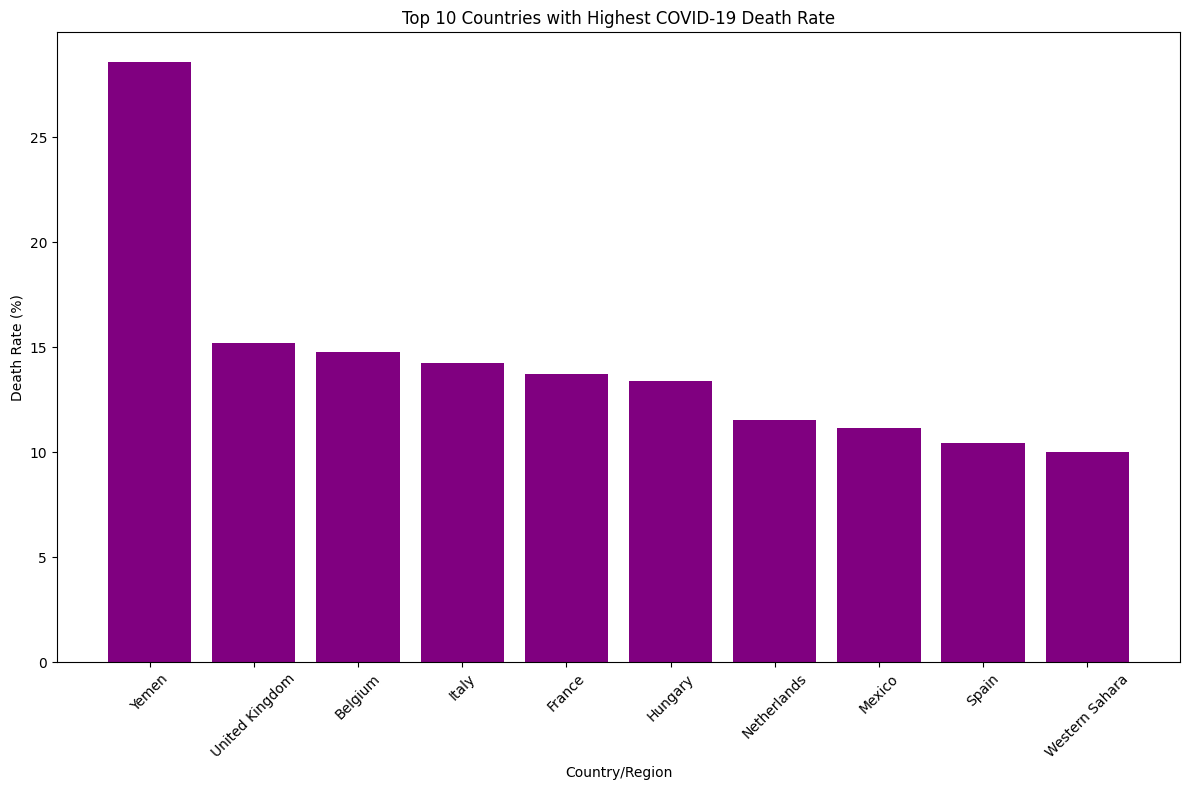

In [53]:
#top 10 country with highest death rate
top_10_death_rate = df.nlargest(10, 'Death Rate')
plt.figure(figsize=(12, 8))
plt.bar(top_10_death_rate['Country/Region'], top_10_death_rate['Death Rate'], color='purple')
plt.xlabel('Country/Region')
plt.ylabel('Death Rate (%)')
plt.title('Top 10 Countries with Highest COVID-19 Death Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(r"C:\Users\AMAN TRIVEDI\Desktop\Python codes\top_10_death_rate.png")
plt.show()